![image info](https://ineuron.ai/images/ineuron-logo.png)

### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
*  Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/google_missing_imputed.csv')

**Show Top 5 Records**

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
8794,Dr. Booster - Boost Game Speed,TOOLS,4.4,138872,22.0,10000000,Free,0.0,Everyone,Tools,2018-05-15,2.0.1077,4.1 and up,15,5,2018
9970,Bird - Enjoy The Ride,TRAVEL_AND_LOCAL,4.3,2649,25.0,500000,Free,0.0,Everyone,Travel & Local,2018-08-03,4.1.1,4.4 and up,3,8,2018
401,Google Allo,COMMUNICATION,4.3,346982,30.0,10000000,Free,0.0,Everyone,Communication,2018-01-23,Varies with device,4.1 and up,23,1,2018
1581,Kawaii Easy Drawing : How to draw Step by Step,LIFESTYLE,4.3,34327,8.1,5000000,Free,0.0,Everyone,Lifestyle,2018-07-17,2.5.1,4.0 and up,17,7,2018
10431,Forgotten Hill Mementoes,GAME,4.6,2027,56.0,100000,Free,0.0,Teen,Adventure,2018-03-19,1.5,4.1 and up,19,3,2018


In [4]:
df.shape

(10840, 16)

In [5]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [6]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

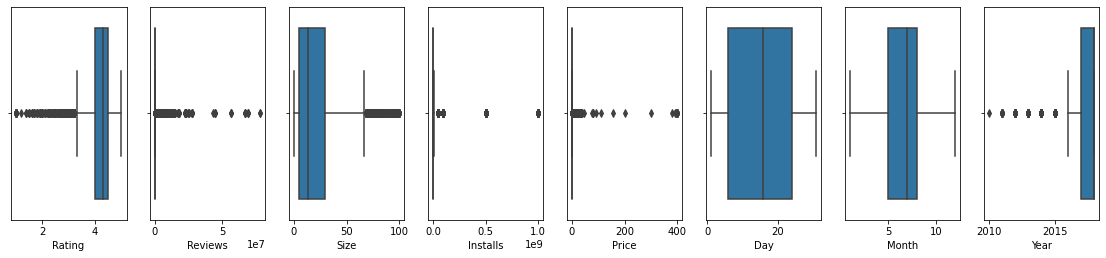

In [7]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- Except Day and month feature we have outliers in all other features

In [8]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [9]:
replace_with_thresholds(num_df, num_df.columns)

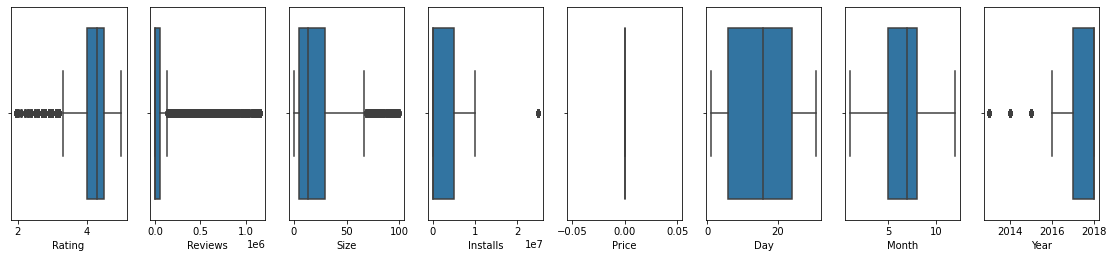

In [10]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

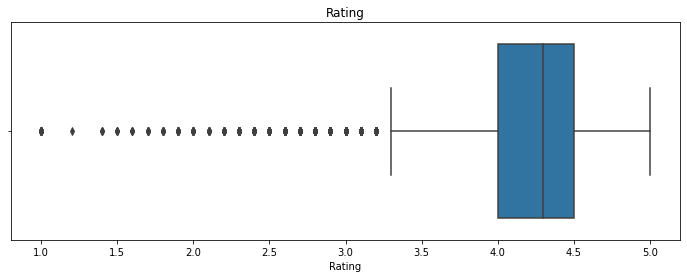

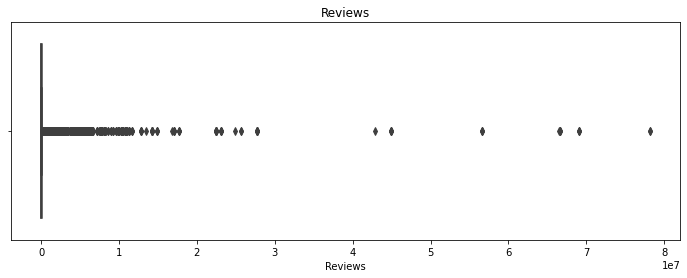

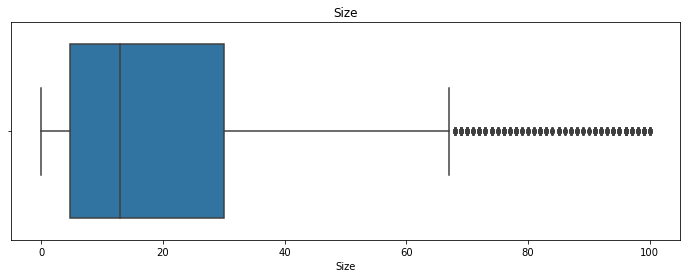

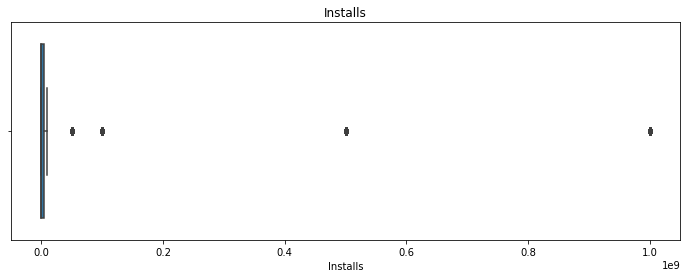

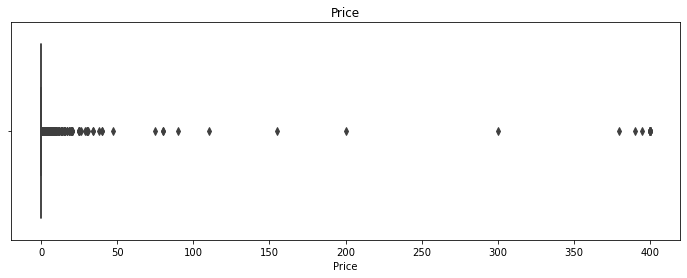

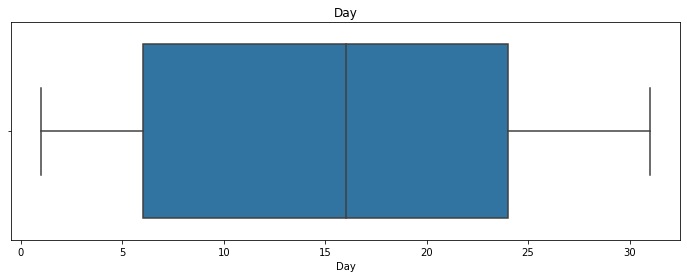

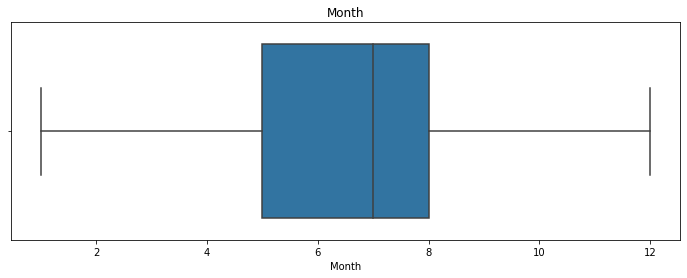

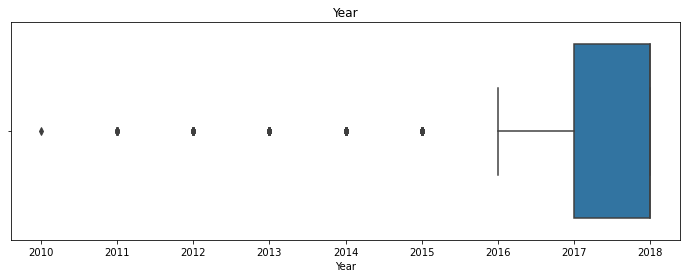

In [11]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [12]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [13]:
remove_outliers_IQR('Size')

percentile25 4.8
percentile75 30.0
Upper limit 67.8
Lower limit -33.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


In [14]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

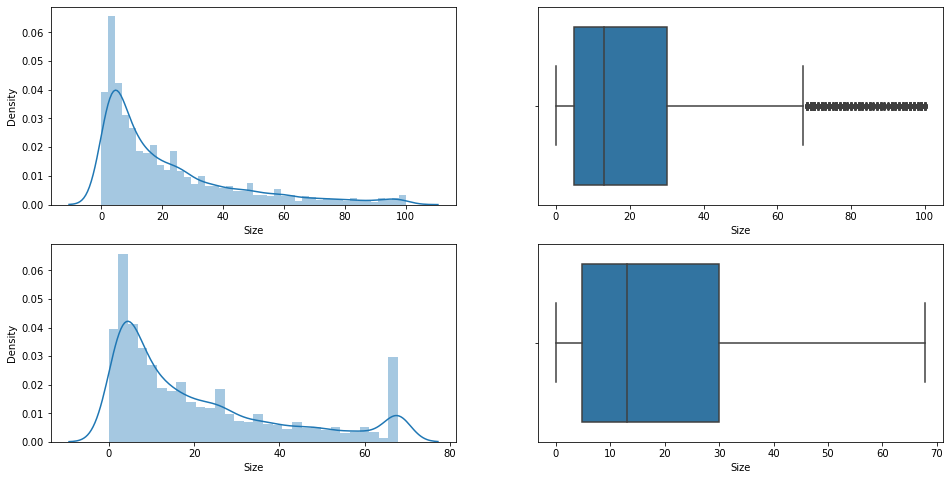

In [15]:
create_comparison_plot(df,df1,"Size")

In [16]:
remove_outliers_IQR('Rating')

percentile25 4.0
percentile75 4.5
Upper limit 5.25
Lower limit 3.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


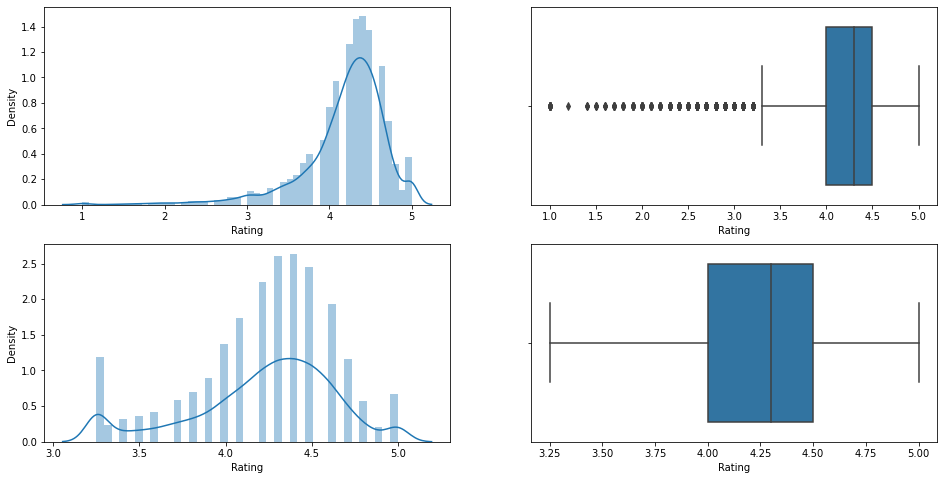

In [17]:
create_comparison_plot(df,df1,"Rating")

In [18]:
remove_outliers_IQR('Reviews')

percentile25 38.0
percentile75 54775.5
Upper limit 136881.75
Lower limit -82068.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


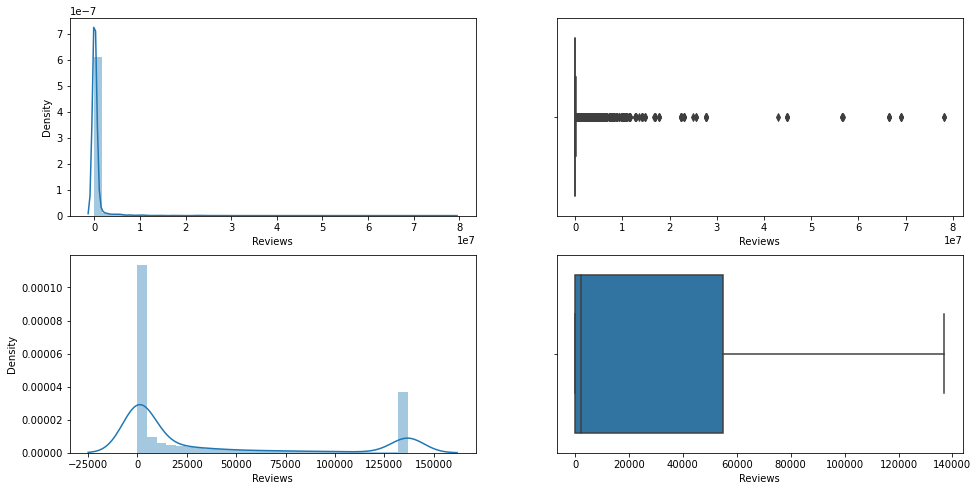

In [19]:
create_comparison_plot(df,df1,"Reviews")

In [20]:
remove_outliers_IQR('Installs')

percentile25 1000.0
percentile75 5000000.0
Upper limit 12498500.0
Lower limit -7497500.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


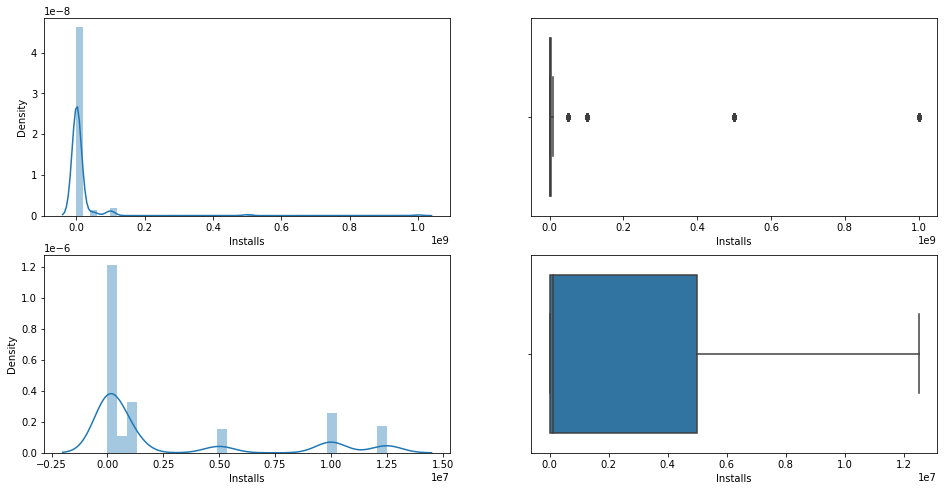

In [21]:
create_comparison_plot(df,df1,"Installs")

In [22]:
remove_outliers_IQR('Year')

percentile25 2017.0
percentile75 2018.0
Upper limit 2019.5
Lower limit 2015.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


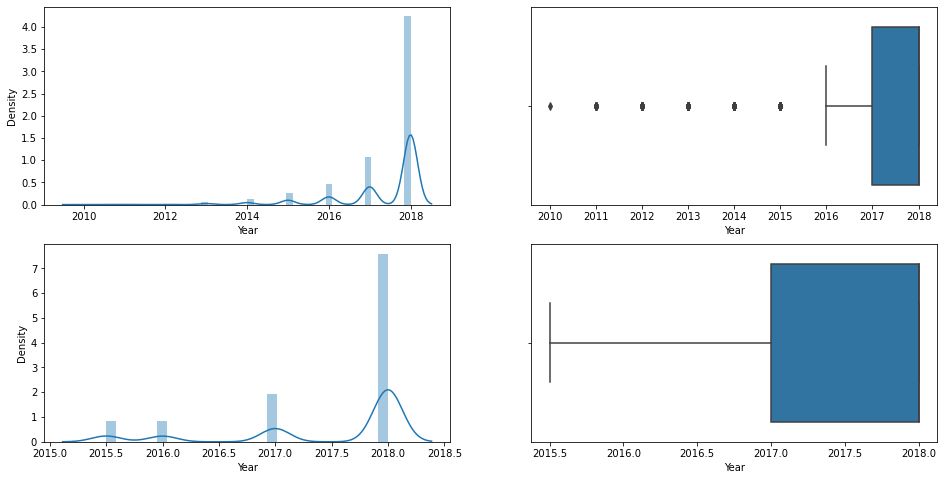

In [23]:
create_comparison_plot(df,df1,"Year")

### 4. Compare Skewness

In [24]:
df.skew()

Rating      -1.835654
Reviews     16.449584
Size         1.534509
Installs     9.572067
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -2.288293
dtype: float64

In [25]:
df1.skew()

Rating      -0.675705
Reviews      1.197882
Size         1.124114
Installs     1.384312
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -1.371946
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [27]:
df1.to_csv('data/google_outliers.csv',index=False)